In [14]:
# Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [8]:
# Load the dataset (update the file path if needed)
file_path = "data.csv"  
df = pd.read_csv(file_path)

In [10]:
df.head()

,x1,x2
0,24.412,32.932
1,35.190,12.189
2,26.288,41.718
3,0.376,15.506
4,26.116,3.963


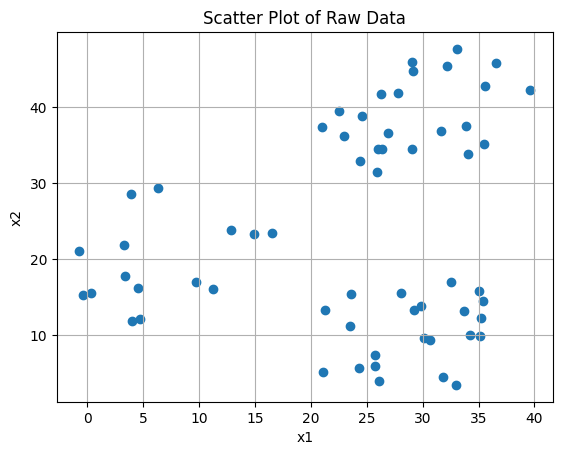

In [13]:
# Scatter plot of raw data
plt.figure(0)
plt.scatter(df['x1'], df['x2'])
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Scatter Plot of Raw Data')
plt.grid(True)
plt.show()

In [21]:
k_values = [2, 3]
np.random.seed(23) #seed for reproducibility
centroids_dict = {} #initializing centroids with each k

for k in k_values:
    centroids_dict[k] = df.sample(n=k).values #randomly selects k points



In [22]:
# Print initial centroids for k=2 and k=3
for k, centroids in centroids_dict.items():
    print(f"Initial Centroids for k={k}:")
    print(centroids)
    print()

Initial Centroids for k=2:
[[32.169 45.421]
 [ 4.55  16.179]]

Initial Centroids for k=3:
[[ 0.376 15.506]
 [21.034 37.463]
 [ 4.55  16.179]]



In [23]:
def euclidean_distance(point1, point2):
    """Calculate Euclidean distance between two points."""
    return np.sqrt(np.sum((point1 - point2) ** 2))

In [24]:
def assign_clusters(data, centroids):
    """Assign each data point to the nearest centroid."""
    clusters = []
    for i in range(len(data)):
        distances = [euclidean_distance(data[i], centroid) for centroid in centroids]
        cluster = np.argmin(distances)  # Find the index of the closest centroid
        clusters.append(cluster)
    return np.array(clusters)


In [26]:
# Convert data to NumPy array for faster computation
data_points = df[['x1', 'x2']].values

In [27]:
# Assign clusters for both k=2 and k=3
clusters_dict = {}
for k in k_values:
    clusters_dict[k] = assign_clusters(data_points, centroids_dict[k])

In [28]:
# Print initial cluster assignments
for k, clusters in clusters_dict.items():
    print(f"Initial Cluster Assignments for k={k}:")
    print(clusters[:10])  # Show only the first 10 assignments
    print()

Initial Cluster Assignments for k=2:
[0 1 0 1 1 0 1 1 0 0]

Initial Cluster Assignments for k=3:
[1 1 1 0 2 1 2 1 1 1]



In [29]:
def update_centroids(data, clusters, k):
    """Compute new centroids as the mean of all points in each cluster."""
    new_centroids = []
    for i in range(k):
        cluster_points = data[clusters == i]  # Get all points belonging to cluster i
        if len(cluster_points) > 0:
            new_centroid = np.mean(cluster_points, axis=0)
        else:
            new_centroid = data[np.random.randint(0, len(data))]  # Reinitialize if empty cluster
        new_centroids.append(new_centroid)
    return np.array(new_centroids)

# Update centroids for k=2 and k=3
new_centroids_dict = {}
for k in k_values:
    new_centroids_dict[k] = update_centroids(data_points, clusters_dict[k], k)

# Print updated centroids
for k, centroids in new_centroids_dict.items():
    print(f"Updated Centroids for k={k}:")
    print(centroids)
    print()


Updated Centroids for k=2:
[[29.54341667 38.081125  ]
 [19.58594444 14.08697222]]

Updated Centroids for k=3:
[[-0.22266667 17.31      ]
 [30.28719355 32.57370968]
 [18.30388462 13.82165385]]



In [30]:
max_iterations = 100
tolerance = 1e-4  # Small value to check for centroid stability

final_centroids_dict = {}  # Store final centroids for k=2 and k=3
final_clusters_dict = {}  # Store final cluster assignments

for k in k_values:
    centroids = centroids_dict[k]  # Start with initial centroids
    for i in range(max_iterations):
        clusters = assign_clusters(data_points, centroids)
        new_centroids = update_centroids(data_points, clusters, k)
        
        # Check for convergence (if centroids do not change significantly)
        if np.all(np.abs(new_centroids - centroids) < tolerance):
            print(f"K={k}: Converged after {i+1} iterations")
            break
        
        centroids = new_centroids  # Update centroids for the next iteration

    final_centroids_dict[k] = centroids
    final_clusters_dict[k] = clusters

# Print final centroids
for k, centroids in final_centroids_dict.items():
    print(f"Final Centroids for k={k}:")
    print(centroids)
    print()


K=2: Converged after 3 iterations
K=3: Converged after 4 iterations
Final Centroids for k=2:
[[29.30495652 39.05078261]
 [20.0032973  14.1327027 ]]

Final Centroids for k=3:
[[ 6.32286667 19.5598    ]
 [29.30495652 39.05078261]
 [29.33086364 10.43240909]]



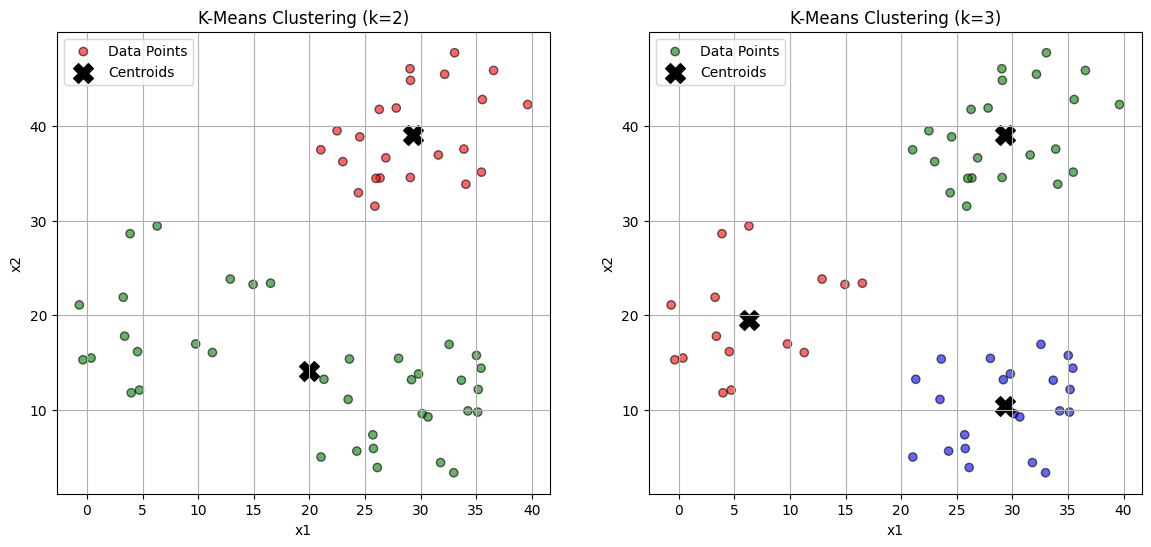

In [31]:
# Define colors for visualization
colors = ['red', 'green', 'blue', 'purple', 'orange']  # Assign different colors for clusters

# Create subplots for k=2 and k=3
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

for idx, k in enumerate(k_values):
    clusters = final_clusters_dict[k]  # Get final cluster assignments
    centroids = final_centroids_dict[k]  # Get final centroids
    
    # Assign colors to clusters
    cluster_colors = [colors[label] for label in clusters]

    # Scatter plot of clustered data
    axes[idx].scatter(df['x1'], df['x2'], c=cluster_colors, alpha=0.6, edgecolors='k', label="Data Points")
    axes[idx].scatter(centroids[:, 0], centroids[:, 1], c='black', marker='X', s=200, label="Centroids")
    
    # Plot styling
    axes[idx].set_xlabel('x1')
    axes[idx].set_ylabel('x2')
    axes[idx].set_title(f'K-Means Clustering (k={k})')
    axes[idx].legend()
    axes[idx].grid(True)

# Show plots
plt.show()
